## Problem Statement:

Given below are distinguishing factors that can provide insight into what grade of the glass is being produced. Your objective as a data scientist is to build a machine learning model that can predict the grade of glass based on the given factors.

## Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Reading train and test files:

In [2]:
training_set=pd.read_csv('Glass_train.csv')
testing_set=pd.read_csv('Glass_test.csv')

In [3]:
training_set.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [4]:
training_set.shape

(1358, 16)

In [5]:
testing_set.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [6]:
testing_set.shape

(583, 15)

In [7]:
training_set['Data']='train'

In [8]:
testing_set['Data']='test'

In [9]:
testing_set['class']=np.nan

In [10]:
combined=pd.concat([training_set,testing_set],sort=False,ignore_index=True)
combined

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,Data
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1.0,train
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1.0,train
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2.0,train
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1.0,train
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1,0,153,55,1479,1494,1249666,1249598,198,198.846687,0,0,0,0,0,NaN,test
1937,0,1,147,43,103,161,157594,156565,2703,2703.985608,0,0,1,0,0,NaN,test
1938,0,1,141,44,1,388,509942,511791,21195,21195.427257,0,0,1,0,0,NaN,test
1939,0,1,212,150,414,451,137693,138014,9169,9169.287230,1,0,0,0,0,NaN,test


In [11]:
combined['x_avg']=(combined['xmax']+combined['xmin'])/2
combined['y_avg']=(combined['ymax']+combined['ymin'])/2
combined.drop(['xmin','xmax','ymin','ymax','log_area'],axis=1,inplace=True)
combined

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,pixel_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,Data,x_avg,y_avg
0,0,1,150,36,439,0,0,1,0,0,1.0,train,158.0,947278.5
1,1,0,134,55,329,1,0,0,0,0,1.0,train,1148.0,2379341.0
2,1,0,135,65,300,0,0,0,0,0,2.0,train,962.0,1037598.0
3,0,1,123,35,6803,0,0,1,0,0,1.0,train,130.5,1705592.0
4,1,0,138,69,251,0,0,0,0,0,2.0,train,464.0,1087351.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1,0,153,55,198,0,0,0,0,0,NaN,test,1486.5,1249632.0
1937,0,1,147,43,2703,0,0,1,0,0,NaN,test,132.0,157079.5
1938,0,1,141,44,21195,0,0,1,0,0,NaN,test,194.5,510866.5
1939,0,1,212,150,9169,1,0,0,0,0,NaN,test,432.5,137853.5


## Checking distribution of numerical features:

In [12]:
l=['max_luminosity',
       'thickness', 'pixel_area', 'x_avg',
       'y_avg']

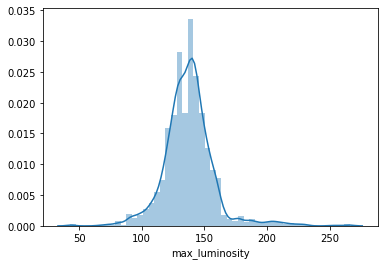

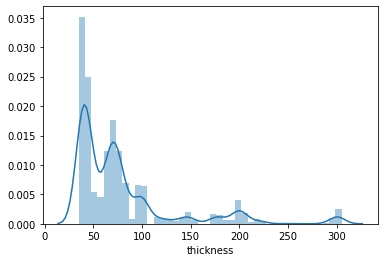

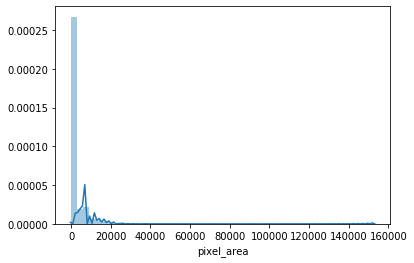

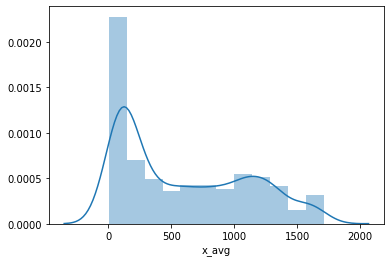

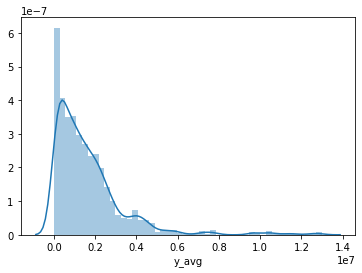

In [13]:
for i in l:
    sns.distplot(combined[i])
    plt.show()

## Checking outliers of numerical features:

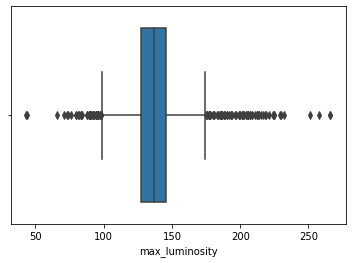

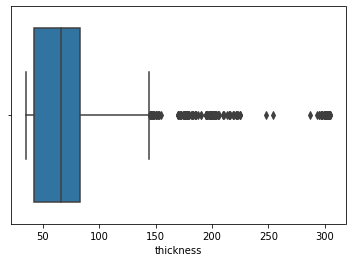

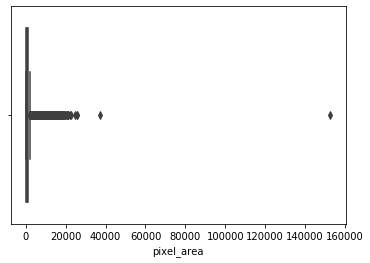

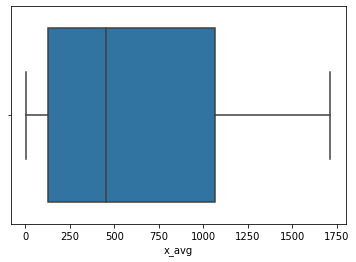

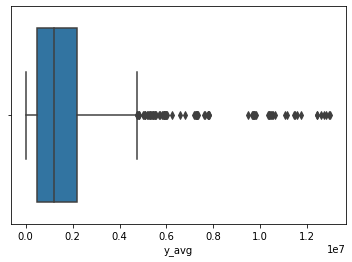

In [14]:
for i in l:
    sns.boxplot(combined[i])
    plt.show()

In [15]:
combined.skew()

grade_A_Component_1     0.407249
grade_A_Component_2    -0.407249
max_luminosity          0.993434
thickness               2.206675
pixel_area             14.085006
x_component_1           3.063973
x_component_2           2.708438
x_component_3           1.489927
x_component_4           4.902448
x_component_5           5.689472
class                   0.644319
x_avg                   0.523679
y_avg                   2.811110
dtype: float64

In [16]:
for i in l:
    combined[i]=list(st.boxcox(combined[i]+1)[0])
combined.skew()

grade_A_Component_1    0.407249
grade_A_Component_2   -0.407249
max_luminosity         0.085627
thickness              0.169867
pixel_area            -0.038360
x_component_1          3.063973
x_component_2          2.708438
x_component_3          1.489927
x_component_4          4.902448
x_component_5          5.689472
class                  0.644319
x_avg                 -0.159090
y_avg                 -0.021219
dtype: float64

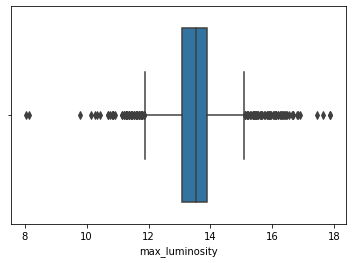

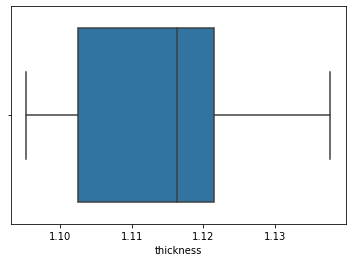

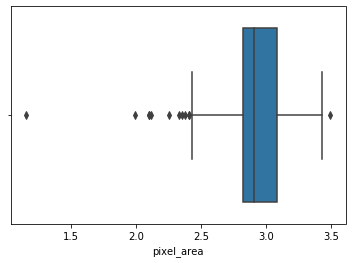

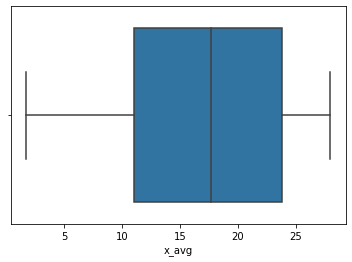

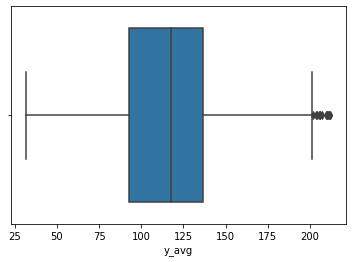

In [17]:
for i in l:
    sns.boxplot(combined[i])
    plt.show()

## Checking whether the target variable is balanced or not :

1.0    887
2.0    471
Name: class, dtype: int64

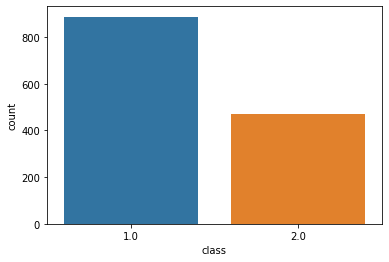

In [18]:
sns.countplot(combined['class'])
combined['class'].value_counts()

In [19]:
#Divide into test and train:
train = combined.loc[combined['Data']=="train"]
test = combined.loc[combined['Data']=="test"]

In [20]:
train.shape

(1358, 14)

In [21]:
test.shape

(583, 14)

In [22]:
train.drop('Data',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test.drop('Data',axis=1,inplace=True)

In [24]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,pixel_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,x_avg,y_avg
0,0,1,14.054602,1.096465,2.950941,0,0,1,0,0,1.0,11.959589,110.778445
1,1,0,13.391945,1.111330,2.894981,1,0,0,0,0,1.0,24.397744,139.403761
2,1,0,13.434795,1.115886,2.876133,0,0,0,0,0,2.0,22.962307,113.333899
3,0,1,12.906550,1.095280,3.310319,0,0,1,0,0,1.0,11.110346,128.314896
4,1,0,13.562142,1.117366,2.838342,0,0,0,0,0,2.0,17.788400,114.670187


In [25]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,pixel_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,x_avg,y_avg
1358,1,0,12.906550,1.115886,3.015624,0,1,0,0,0,NaN,7.092891,127.194980
1359,0,1,14.369097,1.124874,2.943089,0,0,0,0,0,NaN,11.043901,73.793650
1360,0,1,12.769404,1.095280,2.855595,1,0,0,0,0,NaN,8.640463,212.122131
1361,0,1,13.218481,1.099687,3.240362,0,0,1,0,0,NaN,10.647228,83.623117
1362,1,0,13.729224,1.119310,3.065857,0,0,0,0,0,NaN,7.592935,170.569758


## Splitting train dataset into X and y:

In [26]:
X=train.drop('class',axis=1)
y=train['class']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classe

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

# Data Preprocessing using standard scaler
# Reducing dimension using PCA
# Apply classifier

In [29]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])

In [30]:
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])

In [31]:
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])

In [32]:
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNN())])

In [33]:
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])

In [34]:
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                     ('lgbc',lgb.LGBMClassifier())])

In [35]:
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])

In [36]:
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     ('sgradient',SGDClassifier())])

In [37]:
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])

In [38]:
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     ('extratree',ExtraTreesClassifier())])

In [39]:
pipeline_svc=Pipeline([('scalar11',StandardScaler()),
                     ('svc',SVC())])

In [40]:
pipeline_gbc=Pipeline([('scalar12',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])

In [41]:
# Lets make the list of pipelines

In [42]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgbc,pipeline_lgbc,pipeline_ada,pipeline_sgdc,pipeline_nb,pipeline_extratree,pipeline_svc,pipeline_gbc]

In [43]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [44]:
pipe_dict={0:'Logistic Regression',1:'Decision Tree',2:'Random Forest',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'ExtraTree',10:'SVC',11:'GBC'}

In [45]:
smote = SMOTE('minority')

In [46]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1258, 12) (1258,)


In [47]:
for i in pipelines:
    i.fit(X_sm,y_sm)
    predictions=i.predict(X_test)
    print('Classification Report : \n',(classification_report(y_test,predictions)))

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.97      0.72      0.83       258
         2.0       0.67      0.96      0.79       150

    accuracy                           0.81       408
   macro avg       0.82      0.84      0.81       408
weighted avg       0.86      0.81      0.81       408

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.86      0.87      0.87       258
         2.0       0.78      0.76      0.77       150

    accuracy                           0.83       408
   macro avg       0.82      0.82      0.82       408
weighted avg       0.83      0.83      0.83       408

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.91      0.88      0.89       258
         2.0       0.80      0.85      0.82       150

    accuracy                           0.87       408
   macro avg       0.86      0.86      0.86       

In [48]:
for i,model in enumerate(pipelines):
    print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy 0.8112745098039216
Decision Tree Test Accuracy 0.8308823529411765
Random Forest Test Accuracy 0.8676470588235294
KNN Test Accuracy 0.8382352941176471
XGBC Test Accuracy 0.8651960784313726
LGBC Test Accuracy 0.8725490196078431
ADA Test Accuracy 0.8431372549019608
SGDC Test Accuracy 0.7941176470588235
NB Test Accuracy 0.803921568627451
ExtraTree Test Accuracy 0.8602941176470589
SVC Test Accuracy 0.8333333333333334
GBC Test Accuracy 0.8504901960784313


In [49]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_classifier=i
        best_pipeline=model
print("Classifier with best accuracy:{}".format(pipe_dict[best_classifier]))

Classifier with best accuracy:LGBC


### Hyperparameter Tuning using RandomizedSearchCV

In [50]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
r_param = [{"classifier": [LogisticRegression()],
            "classifier__penalty": ['l2','l1'],
            "classifier__C": np.logspace(0, 4, 10)},
           
           {"classifier": [LogisticRegression()],
           "classifier__penalty": ['l2'],
           "classifier__C": np.logspace(0, 4, 10),
           "classifier__solver":['newton-cg','saga','sag','liblinear']},
           
          {"classifier": [DecisionTreeClassifier()],
           "classifier__criterion":['gini','entropy'],
           "classifier__max_depth":[5,8,15,25,30,None]
           "classifier__min_samples_leaf":[1,2,5,10,15,100],
           "classifier__max_leaf_nodes": [2, 5,10]},
     
          {"classifier": [RandomForestClassifier()],
           "classifier__n_estimators": [10, 100, 1000],
           "classifier__max_depth":[5,8,15,25,30,None], 
           "classifier__min_samples_leaf":[1,2,5,10,15,100],
           "classifier__max_leaf_nodes": [2, 5,10]},
      
           {'classifier':[lgb.LGBMClassifier()],
            'classifier__n_estimators':np.arange(50,250,5),
            'classifier__max_depth':np.arange(2,15,5),
            'classifier__num_leaves':np.arange(2,60,5)},
           
           {'classifier':[XGBClassifier()],
            "classifier__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "classifier__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "classifier__min_child_weight" : [ 1, 3, 5, 7 ],
            "classifier__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "classifier__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]},
           
           {'classifier':[AdaBoostClassifier()],        
           "classifier__n_estimators": sp_randint(50,250), 
            'classifier__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
            'classifier__algorithm': ['SAMME', 'SAMME.R']},
           
           {'classifier':[KNN()],
            "classifier__weights":['uniform','distance'],
            'classifier__n_neighbors':np.arange(1,40),
            'classifier__leaf_size':np.arange(2,40)},
           
           {'classifier':[SVC()],                      
           'classifier__gamma':np.logspace(-4,2,10000),
           'classifier__C':np.logspace(-2,2,10000)},
           
           {"classifier":[GradientBoostingClassifier()],
            "classifier__learning_rate":np.arange(0.05,0.5,0.01),
            "classifier__n_estimators":np.arange(50,250,5),
            'classifier__max_depth':np.arange(4,15,5),
            "classifier__min_samples_leaf":[1,2,5,10,15,100],
            "classifier__max_leaf_nodes": [2, 5,10]}
           
          ]

SyntaxError: invalid syntax (<ipython-input-50-0fdd339d1d48>, line 16)

In [ ]:
rsearch = RandomizedSearchCV(pipe, r_param, cv=5, verbose=0,n_jobs=-1,random_state=0)

In [ ]:
best_model_r = rsearch.fit(X_sm,y_sm)

In [ ]:
print(best_model_r.best_estimator_)
print("The mean accuracy of the model is through randomized search is :",best_model_r.score(X_test,y_test))

In [ ]:
Final_model=GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.060000000000000005,
                                            loss='deviance', max_depth=14,
                                            max_features=None,
                                            max_leaf_nodes=10,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=135,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                            random_state=None, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)

In [ ]:
model=Final_model.fit(X_sm,y_sm)
model

In [ ]:
model.score(X_test,y_test)

In [ ]:
test.drop('class',axis=1,inplace=True)

In [ ]:
test.head()

In [ ]:
predictions=model.predict(test)

In [ ]:
predictions

In [ ]:
predictions.shape

In [ ]:
predictions_prob=a.predict_proba(test)
Submission = pd.DataFrame(predictions_prob)

In [ ]:
Submission.to_csv('Submission_glass.csv',index=False)